<a href="https://colab.research.google.com/github/moustafa-7/EEG_Seizure_prediction/blob/master/EEG_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyedflib

     |████████████████████████████████| 1.1MB 4.0MB/s 
  Created wheel for pyedflib: filename=pyEDFlib-0.1.14-cp36-cp36m-linux_x86_64.whl size=920355 sha256=6e3e09c5cbb71ff4f65f7734cb6df009a88266d60fc19db859f47cef6de84979
  Stored in directory: /root/.cache/pip/wheels/6a/62/a0/3d06c48411a5f8e18a7d7376243b81520af87cbd6f24d21cfd
Successfully built pyedflib


In [62]:
from google.colab import drive
import pyedflib

drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
df = pd.read_csv("/content/seizures_info - Sheet1.csv")

In [0]:
df = df.iloc[:,0:4]

In [0]:
base_path = "drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/"

In [0]:
files = list(df.iloc[:,0])
start_time = list(df.iloc[:,2])
end_time = list(df.iloc[:,3])

folders = []

for i in range(len(files)):
  
  folders.append(files[i][:-3])
  
  
del folders[8]

del files[8]


del start_time[8]
del start_time[146]
#del start_time[148]

del end_time[8]
del end_time[146]
#del end_time[148]

In [0]:
import glob
import numpy as np




# filling this numpy array with the signals of the edf file
for i in range(len(folders)):
  f = 0
  i = i + 184
  
  print(i)
  
  f = pyedflib.EdfReader(base_path + folders[i] + '/' +files[i] + ".edf")

  # This gives you how many signals in this edf file in this case there are 23 signals
  n = f.signals_in_file

  # this gives you the label of each signal like this ('FP1-F7', 'F7-T7', 'T7-P7', and so on)
  signal_labels = f.getSignalLabels()
  
  # this is just saying I want a numpy of the same shape of our signal that I will fill with our signal's values
  sigbufs = np.zeros((5, end_time[i]*256 - start_time[i]*256))
  
  sigbufs[0, :] = f.readSignal(7)[start_time[i]*256: end_time[i]*256] 
  sigbufs[1, :] = f.readSignal(9)[start_time[i]*256: end_time[i]*256]
  sigbufs[2, :] = f.readSignal(12)[start_time[i]*256: end_time[i]*256]
  sigbufs[3, :] = f.readSignal(15)[start_time[i]*256: end_time[i]*256]
  sigbufs[4, :] = f.readSignal(20)[start_time[i]*256: end_time[i]*256]
  
  data.append(sigbufs)
  
  

184
185
186
187
188
189
190
191
192
193
194
195
196


IndexError: ignored

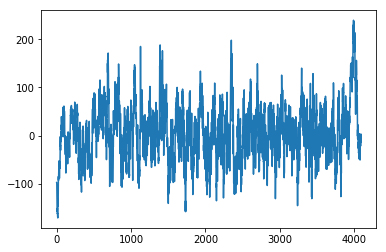

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(data[30][4])

In [0]:
import pickle
with open('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle', 'wb') as filee:
    pickle.dump(data, filee)

In [0]:
filer = pickle.load('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle')

TypeError: ignored

In [0]:
import pickle

with open('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle', 'rb') as filee:
   data = pickle.load(filee)

In [0]:
data

In [0]:
len(data[2])

5

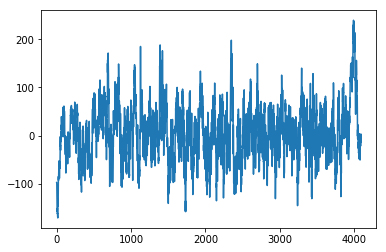

In [0]:
import matplotlib.pyplot as plt
plt.plot(data[30][4])

In [0]:
data_split = []
for i in range(len(data)):
  for j in range(len(data[i][0])//512):
    data_split.append(data[i][:,j*512 : (j+1)*512])

In [0]:
len(data_split)

5557

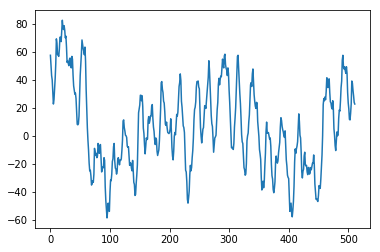

In [0]:
plt.plot(data_split[0][0])

In [0]:
data[0][:,1:3]

array([[ 50.20757021,  43.17460317],
       [ 25.2014652 ,  18.16849817],
       [ 76.38583639,  75.21367521],
       [-51.37973138, -70.13431013],
       [ 36.92307692,  54.8962149 ]])

In [0]:
os.chdir("")

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

import numpy as np



W = 2


for i in range(len(data_split)):
  figure(figsize=(2.27, 2.27), dpi=100)
  img = plt.figure(i)
  plt.axis('off')
  #plt.ylim(-300, 300)
  plt.plot(np.linspace(0, 2, W*256), data_split[i][0]+0*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][1]+1*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][2]+2*300, color='green') 
  plt.plot(np.linspace(0, 2, W*256), data_split[i][3]+3*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][4]+4*300, color='green')
#   plt.plot(np.linspace(start, end, W*256), sigbufs[12, i*W*256 : (i+1)*W*256]+5*350, color='green')
#   plt.plot(np.linspace(start, end, W*256), sigbufs[13, i*W*256 : (i+1)*W*256]+6*350, color='green')
  
  img.savefig('plot_'+str(i)+'.jpeg')


In [0]:
!ls

drive		plot_1.jpeg	plot_3000.jpeg	plot_4001.jpeg	plot_5002.jpeg
plot_0.jpeg	plot_2000.jpeg	plot_3001.jpeg	plot_4002.jpeg	plot_5003.jpeg
plot_1000.jpeg	plot_2001.jpeg	plot_3002.jpeg	plot_4003.jpeg	plot_5004.jpeg
plot_1001.jpeg	plot_2002.jpeg	plot_3003.jpeg	plot_4004.jpeg	plot_5005.jpeg
plot_1002.jpeg	plot_2003.jpeg	plot_3004.jpeg	plot_4005.jpeg	plot_5006.jpeg
plot_1003.jpeg	plot_2004.jpeg	plot_3005.jpeg	plot_4006.jpeg	plot_5007.jpeg
plot_1004.jpeg	plot_2005.jpeg	plot_3006.jpeg	plot_4007.jpeg	plot_5008.jpeg
plot_1005.jpeg	plot_2006.jpeg	plot_3007.jpeg	plot_4008.jpeg	plot_5009.jpeg
plot_1006.jpeg	plot_2007.jpeg	plot_3008.jpeg	plot_4009.jpeg	plot_500.jpeg
plot_1007.jpeg	plot_2008.jpeg	plot_3009.jpeg	plot_400.jpeg	plot_5010.jpeg
plot_1008.jpeg	plot_2009.jpeg	plot_300.jpeg	plot_4010.jpeg	plot_5011.jpeg
plot_1009.jpeg	plot_200.jpeg	plot_3010.jpeg	plot_4011.jpeg	plot_5012.jpeg
plot_100.jpeg	plot_2010.jpeg	plot_3011.jpeg	plot_4012.jpeg	plot_5013.jpeg
plot_1010.jpeg	plot_2011.jpeg	plot_3012.jpeg

In [0]:
os.mkdir("/content/drive/My Drive/EEG_project/seizures")

In [0]:
!ls

In [0]:
from PIL import Image
for i in range(len(data_split)):
  img=Image.open('plot_'+str(i)+'.jpeg').convert("L")
  img.save("/content/drive/My Drive/EEG_project/seizures/"+str(i)+'.jpeg')

In [0]:
for i in range(len(data_split)):
  os.remove("plot_"+str(i)+".jpeg")

In [0]:
import pandas as pd
df = pd.read_csv("/content/no_seizure - Sheet1.csv")

In [0]:
df = df.iloc[:,0:4]

In [0]:
df

In [0]:
base_path = "drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/"

In [0]:
files = list(df.iloc[:,0])
start_time = list(df.iloc[:,1])
end_time = list(df.iloc[:,2])

folders = []

for i in range(len(files)):
  
  folders.append(files[i][:-3])
  



In [0]:
folders[16] = folders[16][:-1]
folders

['chb01',
 'chb02',
 'chb03',
 'chb04',
 'chb05',
 'chb06',
 'chb07',
 'chb08',
 'chb09',
 'chb10',
 'chb11',
 'chb12',
 'chb13',
 'chb14',
 'chb15',
 'chb16',
 'chb17',
 'chb18',
 'chb19',
 'chb20',
 'chb21',
 'chb22',
 'chb23',
 'chb24']

In [0]:
import glob
import numpy as np


data = []

# filling this numpy array with the signals of the edf file
for i in range(len(folders)):
  f = 0
  
  print(i)
  
  f = pyedflib.EdfReader(base_path + folders[i] + '/' +files[i] + ".edf")

  # This gives you how many signals in this edf file in this case there are 23 signals
  n = f.signals_in_file

  # this gives you the label of each signal like this ('FP1-F7', 'F7-T7', 'T7-P7', and so on)
  signal_labels = f.getSignalLabels()
  
  # this is just saying I want a numpy of the same shape of our signal that I will fill with our signal's values
  sigbufs = np.zeros((5, end_time[i]*256 - start_time[i]*256))
  
  sigbufs[0, :] = f.readSignal(7)[start_time[i]*256: end_time[i]*256] 
  sigbufs[1, :] = f.readSignal(9)[start_time[i]*256: end_time[i]*256]
  sigbufs[2, :] = f.readSignal(12)[start_time[i]*256: end_time[i]*256]
  sigbufs[3, :] = f.readSignal(15)[start_time[i]*256: end_time[i]*256]
  sigbufs[4, :] = f.readSignal(20)[start_time[i]*256: end_time[i]*256]
  
  data.append(sigbufs)
  
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [0]:
import pickle
with open('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/no_seizure_data.pickle', 'wb') as filee:
    pickle.dump(data, filee)

In [0]:
data_split = []
for i in range(len(data)):
  for j in range(len(data[i][0])//512):
    data_split.append(data[i][:,j*512 : (j+1)*512])

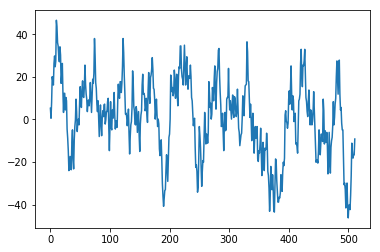

In [0]:
plt.plot(data_split[0][0])

In [0]:
len(data_split[0][0])

512

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


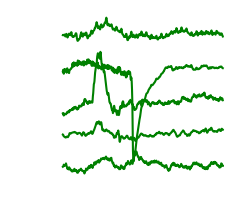

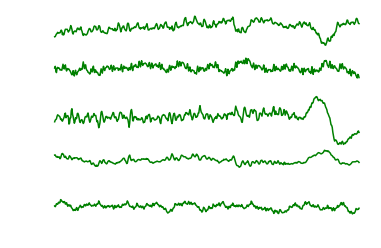

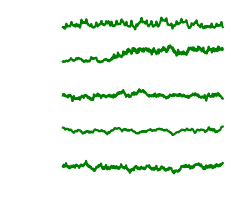

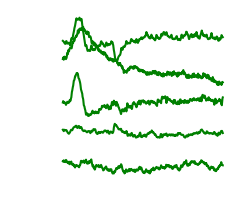

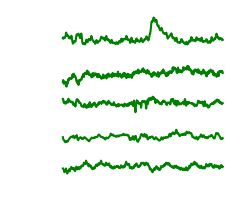

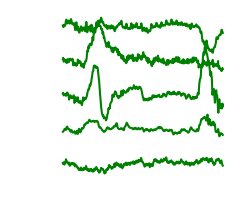

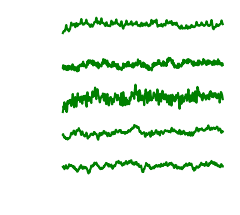

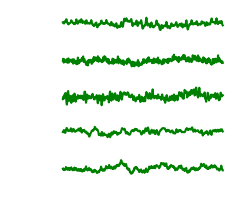

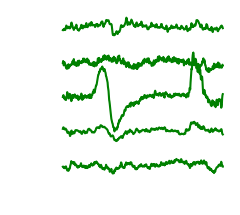

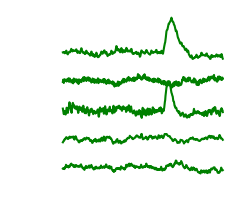

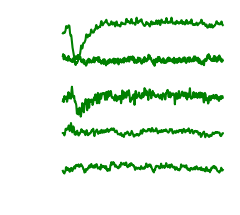

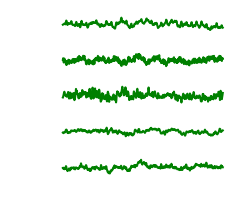

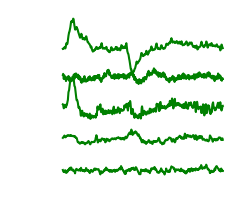

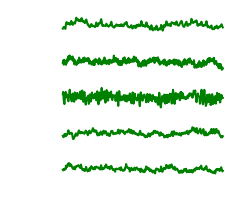

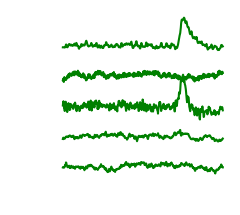

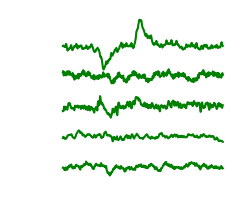

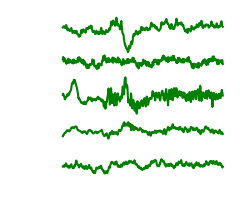

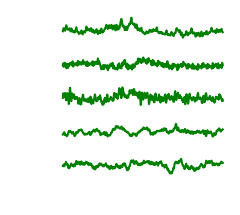

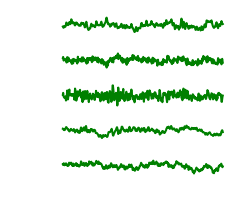

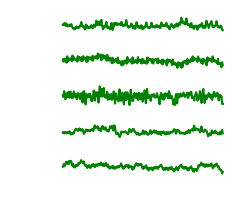

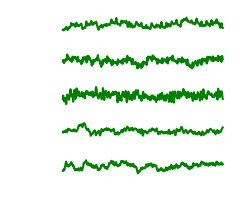

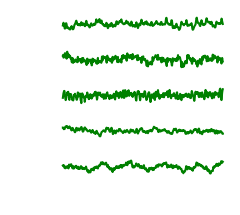

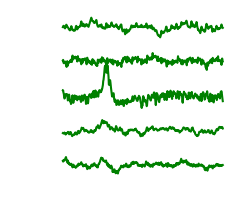

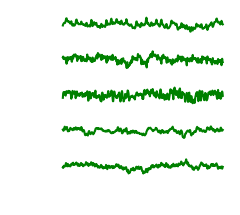

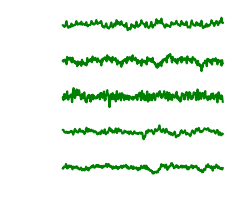

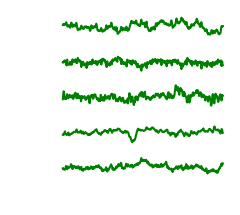

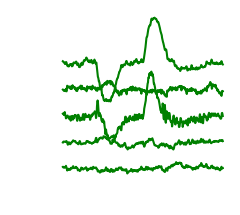

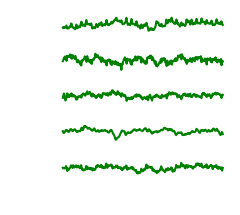

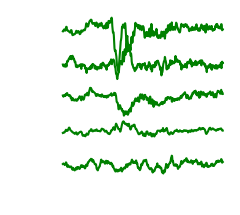

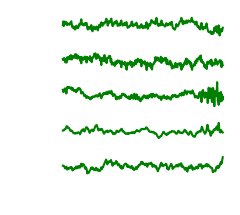

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

import numpy as np



W = 2


for i in range(len(data_split)):
  figure(figsize=(2.27, 2.27), dpi=100)
  img = plt.figure(i)
  plt.axis('off')
  #plt.ylim(-300, 300)
  plt.plot(np.linspace(0, 2, W*256), data_split[i][0]+0*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][1]+1*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][2]+2*300, color='green') 
  plt.plot(np.linspace(0, 2, W*256), data_split[i][3]+3*300, color='green')
  plt.plot(np.linspace(0, 2, W*256), data_split[i][4]+4*300, color='green')
#   plt.plot(np.linspace(start, end, W*256), sigbufs[12, i*W*256 : (i+1)*W*256]+5*350, color='green')
#   plt.plot(np.linspace(start, end, W*256), sigbufs[13, i*W*256 : (i+1)*W*256]+6*350, color='green')
  
  img.savefig('plot_'+str(i)+'.jpeg')

In [0]:
from PIL import Image
for i in range(len(data_split)):
  img=Image.open('plot_'+str(i)+'.jpeg').convert("L")
  img.save("/content/drive/My Drive/EEG_project/no_seizures/"+str(i)+'.jpeg')

In [59]:
!ls

 drive	'no_seizure - Sheet1.csv'   sample_data


In [0]:
import glob
import cv2
img_dir = "/content/drive/My Drive/EEG_project/no_seizures/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files_1 = glob.glob(data_path)

data = []
for f1 in files_1:
    img = cv2.imread(f1,0)
    data.append([cv2.resize(img,(224,224)),0])

In [61]:
data

[]

In [0]:
img_dir = "/content/drive/My Drive/EEG_project/seizures/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files_2 = glob.glob(data_path)

for f1 in files_2:
    img = cv2.imread(f1,0)
    data.append([cv2.resize(img,(224,224)),1])

In [65]:
len(data)

11077

In [0]:
from numpy import newaxis
for i in range(len(data)):
  data[i][0] = data[i][0][newaxis,:,:]

In [81]:
data[100][0].shape

(1, 224, 224)

In [0]:
import random
random.shuffle(data)

In [0]:
x = []
y = []

test_size = 1000

for i in range(len(data)):
  x.append(data[i][0])
  y.append(data[i][1])

In [0]:
import numpy
x = numpy.array(x)
y = numpy.array(y)

In [85]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
x_test = []
y_test = []

for i in range(test_size):
  x_test.append(data[len(data)-i-test_size][0])
  y_test.append(data[len(data)-i-test_size][1])

  
x_test = numpy.array(x_test)
y_test = numpy.array(y_test)

In [86]:
x.shape

(11077, 1, 224, 224)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()
"""
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(7,7), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
"""
# Passing it to a Fully Connected layer
model.add(Conv2D(64, (11, 11),input_shape=(1,224,224), padding='same',))
model.add(Flatten())
model.add(Activation('relu'))

"""
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
"""
# 2nd Fully Connected Layer
model.add(Dense(2048))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(64))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

opt = keras.optimizers.Adam(0.00005, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=opt, metrics=["accuracy"])
model.fit(x, y, batch_size=16, epochs=200, verbose=1, validation_split=0.1, shuffle='True')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 1, 224, 64)        1734720   
_________________________________________________________________
flatten_15 (Flatten)         (None, 14336)             0         
_________________________________________________________________
activation_109 (Activation)  (None, 14336)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 2048)              29362176  
_________________________________________________________________
activation_110 (Activation)  (None, 2048)              0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 1000)            